In [1]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt
import nltk
import re


In [2]:
def readData():
    df = pd.read_csv(f'./data/conspiracy_submissions_filtered.csv', compression='gzip')
    df = df[['title']]
    df['label'] = 0
    df_control = pd.read_csv(f'./data/worldnews_submissions_filtered.csv', compression='gzip')
    df_control = df_control[['title']]
    df_control['label'] = 1
    df = pd.concat([df, df_control], axis=0)
    return df

def showBalance(df):
    fig = plt.figure(figsize=(8,6))
    df.groupby('label').count().plot.bar(ylim=0)
    plt.show()


In [3]:
df = readData()
df.head()

,title,label
0,Just opened my eyes,0
1,We are experiencing an almost unnatural divisi...,0
2,"I am very, very grateful that Hillary Clinton ...",0
3,"“Putin may circle Kyiv with tanks, but he’ll n...",0
4,Putin locking up people including kids for pro...,0


<Figure size 576x432 with 0 Axes>

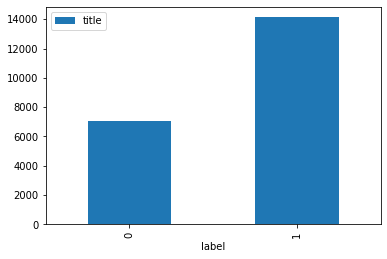

In [4]:
showBalance(df)

In [5]:
def preprocessing(text):
    text = str(text)
    text = text.lower()
    return re.sub(r"(@\[A-Za-z0-9]+)|(\w+:\/\/\S+)|^&gt;","",text)

def tokenize(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    lemmatizer = nltk.WordNetLemmatizer()
    text = re.sub(r"[^0-9A-Za-z' \t]","",text)
    text = tokenizer.tokenize(text)
    text = [lemmatizer.lemmatize(word, pos="v") for word in text]
    return text

In [6]:
tfidf = TfidfVectorizer(preprocessor=preprocessing,
                        tokenizer=tokenize,
                        sublinear_tf=True, 
                        min_df=5, 
                        norm='l2', 
                        encoding='utf-8', 
                        ngram_range=(1, 2), 
                        stop_words='english')
features = tfidf.fit_transform(df.title).toarray()
labels = df.label
features.shape

C:\Users\isoma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn(


(21178, 7723)

In [7]:
def printTopFeaturesPerCategory(category):
  '''chi2_features = chi2(features, labels == category)
  chi2_features = np.argsort(chi2_features[0])
  print(category, chi2_features)
  feature_names = np.array(tfidf.get_feature_names_out())[chi2_features]
  print(feature_names[:10])'''
  







In [8]:
#printTopFeaturesPerCategory(0)
#printTopFeaturesPerCategory(1)

In [9]:
tfidf_vectorizer = TfidfVectorizer()

In [10]:

X_train, X_test, y_train, y_test = train_test_split(df['title'], df['label'], random_state = 42)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tf = tfidf_vectorizer.transform(X_test)


In [11]:
def predict(model):
    clf = model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tf)
    rep = classification_report(y_test, y_pred)
    print(rep)
    conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
    conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    conf_matrix_display.plot(cmap='Blues')

              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1765
           1       0.85      0.95      0.90      3530

    accuracy                           0.85      5295
   macro avg       0.86      0.80      0.82      5295
weighted avg       0.85      0.85      0.85      5295

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1765
           1       0.89      0.92      0.90      3530

    accuracy                           0.87      5295
   macro avg       0.86      0.85      0.85      5295
weighted avg       0.87      0.87      0.87      5295

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1765
           1       0.88      0.93      0.90      3530

    accuracy                           0.87      5295
   macro avg       0.86      0.84      0.85      5295
weighted avg       0.87      0.87      0.87      5295



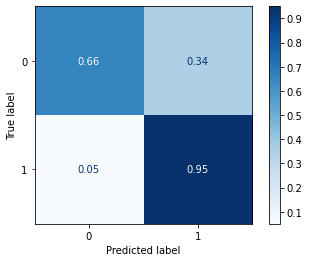

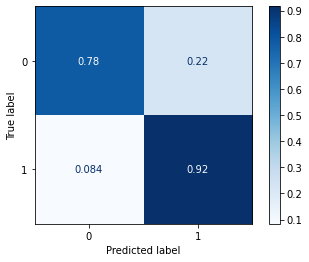

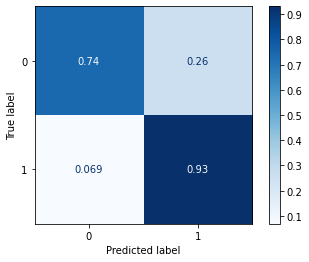

In [12]:
naive_bayes = MultinomialNB()
linear_svc = LinearSVC()
log_reg = LogisticRegression(random_state=42)
scores = []
predict(naive_bayes)
predict(linear_svc)
predict(log_reg)
